In [6]:
from dataset import * 


In [7]:
device = 'cuda:2'

In [8]:
images = load_img_to_tensor(MRI_DIR, device=device)

Loading images: 100%|██████████| 48406/48406 [00:29<00:00, 1664.21it/s]


In [9]:
# Split the images
train_images, test_images = split_images(images, train_ratio=0.833)

# Create datasets with the split images (remove split parameter)
train_dataset = MRIDataset(train_images, acc=4, num_coils=64, acs_lines=32, kernel_size=(3, 3), operator=GRAPPAOperator, device=device)
test_dataset = MRIDataset(test_images, acc=4, num_coils=64, acs_lines=32, kernel_size=(3, 3), operator=GRAPPAOperator, device=device)

train_dataloader = MRIDataLoader(train_dataset, batch_size=64, shuffle=True, operator=GRAPPAOperator)
test_dataloader = MRIDataLoader(test_dataset, batch_size=64, shuffle=False, operator=GRAPPAOperator)

# Now check the sizes
print("Dataset Size:", len(train_dataset))
print("Batch Size:", train_dataloader.batch_size)
print("Number of Batches:", len(train_dataloader))

print()
print("Dataset Size:", len(test_dataset))
print("Batch Size:", test_dataloader.batch_size)
print("Number of Batches:", len(test_dataloader))

OutOfMemoryError: CUDA out of memory. Tried to allocate 15.38 GiB. GPU 2 has a total capacity of 47.43 GiB of which 9.71 GiB is free. Including non-PyTorch memory, this process has 37.71 GiB memory in use. Of the allocated memory 37.38 GiB is allocated by PyTorch, and 16.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Testing dataloader...
Length of dataset: 631
Batch 0:
  Images shape: torch.Size([64, 1, 320, 320])
  Measurements shape: torch.Size([64, 8, 320, 320])
  Reconstructions shape: torch.Size([64, 1, 320, 320])
  Device: cuda:2


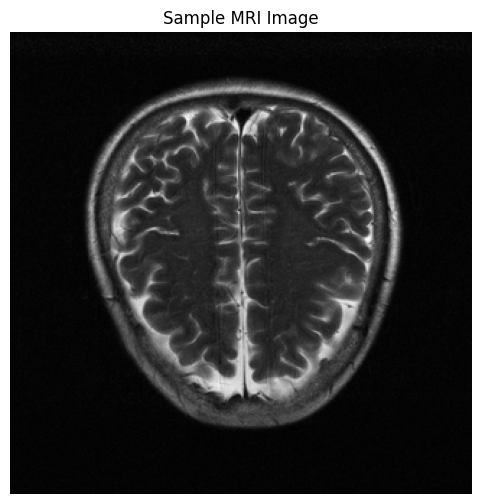

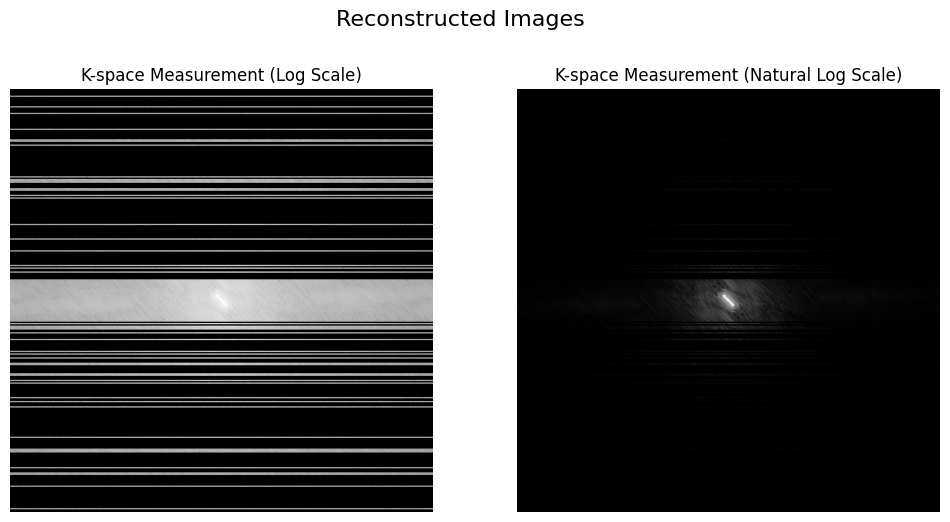

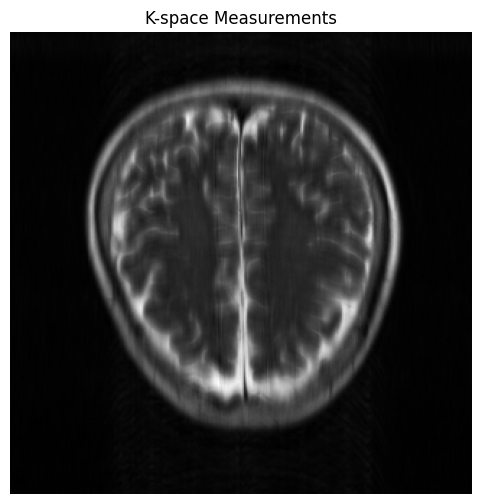

Batch 1:
  Images shape: torch.Size([64, 1, 320, 320])
  Measurements shape: torch.Size([64, 8, 320, 320])
  Reconstructions shape: torch.Size([64, 1, 320, 320])
  Device: cuda:2
Batch 2:
  Images shape: torch.Size([64, 1, 320, 320])
  Measurements shape: torch.Size([64, 8, 320, 320])
  Reconstructions shape: torch.Size([64, 1, 320, 320])
  Device: cuda:2


In [ ]:
print("Testing dataloader...")
print("Length of dataset:", len(train_dataloader))
for batch_idx, batch in enumerate(train_dataloader):
    images = batch['images']
    measurements = batch['measurements']
    reconstructions = batch['reconstructions']
    
    print(f"Batch {batch_idx}:")
    print(f"  Images shape: {images.shape}")
    print(f"  Measurements shape: {measurements.shape}")
    print(f"  Reconstructions shape: {reconstructions.shape}")
    print(f"  Device: {images.device}")
    
    # Visualize first image in first batch
    if batch_idx == 0:
        visualize_single_image(images[0], title="Sample MRI Image", cmap='gray')
        visualize_single_measurement(measurements[0], title="Reconstructed Images")
        visualize_single_reconstructed(reconstructions[0], title="K-space Measurements")
    
    if batch_idx >= 2:  # Test only first few batches
        break